## Student Depression

In [1]:
import pandas as pd 
import numpy  as np
import seaborn as sea
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('datasets\\StudentDepression\\StudentDepression.csv')

## Tratamento dos dados
Verificando cada coluna no conjunto de dados para verificar se há inconsistencias

In [22]:
data.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

`Verificando dados nuls`

In [ ]:
for col in data.columns:
    sum_ = data[col].isna().sum()
    if sum_ > 0:
        print(f'{col} : tem dados nulos ({sum_})')

Financial Stress : tem dados nulos (3)


> Como os atributos restantes não tem dados nulos será feito so o tratamento de incosistencia de atributos categoricos

In [23]:
# dados categoricos
data.select_dtypes(exclude=['int','float','datetime64[ns]']).columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

`Gender`

In [4]:
data['Gender'].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

`City`

In [13]:
data['City'].value_counts().index

Index(['Kalyan', 'Srinagar', 'Hyderabad', 'Vasai-Virar', 'Lucknow', 'Thane',
       'Ludhiana', 'Agra', 'Surat', 'Kolkata', 'Jaipur', 'Patna',
       'Visakhapatnam', 'Pune', 'Ahmedabad', 'Bhopal', 'Chennai', 'Meerut',
       'Rajkot', 'Delhi', 'Bangalore', 'Ghaziabad', 'Mumbai', 'Vadodara',
       'Varanasi', 'Nagpur', 'Indore', 'Kanpur', 'Nashik', 'Faridabad',
       'Saanvi', 'Bhavna', 'City', 'Harsha', 'Kibara', 'Nandini', 'Nalini',
       'Mihir', 'Nalyan', 'M.Com', 'ME', 'Rashi', 'Gaurav', 'Reyansh', 'Harsh',
       'Vaanya', 'Mira', 'Less than 5 Kalyan', '3.0', 'Less Delhi', 'M.Tech',
       'Khaziabad'],
      dtype='object', name='City')

`Profession`

In [24]:
data['Profession'].value_counts().index

Index(['Student', 'Architect', 'Teacher', 'Digital Marketer', 'Content Writer',
       'Chef', 'Doctor', 'Pharmacist', 'Civil Engineer', 'UX/UI Designer',
       'Educational Consultant', 'Manager', 'Lawyer', 'Entrepreneur'],
      dtype='object', name='Profession')

`Sleep Duration`

In [26]:
data['Sleep Duration'].value_counts().index

Index(['Less than 5 hours', '7-8 hours', '5-6 hours', 'More than 8 hours',
       'Others'],
      dtype='object', name='Sleep Duration')

> Outhers será tratando como dados nulos

In [30]:
data['Sleep Duration'] = data['Sleep Duration'].apply(lambda x: pd.NA if x == 'Others' else x)

In [32]:
data['Sleep Duration'].value_counts(dropna=False)

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
<NA>                   18
Name: count, dtype: int64

> Tem 18 valores nulos nessa coluna

`Dietary Habits`

In [33]:
data['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [34]:
data['Dietary Habits'] = data['Dietary Habits'].apply(lambda x: pd.NA if x == 'Others' else x)

In [35]:
data['Dietary Habits'].value_counts(dropna=False)

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
<NA>            12
Name: count, dtype: int64

`Degree`

In [16]:
data['Degree'].isna().value_counts()

Degree
False    27901
Name: count, dtype: int64

In [15]:
data['Degree'].value_counts().index

Index(['Class 12', 'B.Ed', 'B.Com', 'B.Arch', 'BCA', 'MSc', 'B.Tech', 'MCA',
       'M.Tech', 'BHM', 'BSc', 'M.Ed', 'B.Pharm', 'M.Com', 'MBBS', 'BBA',
       'LLB', 'BE', 'BA', 'M.Pharm', 'MD', 'MBA', 'MA', 'PhD', 'LLM', 'MHM',
       'ME', 'Others'],
      dtype='object', name='Degree')

`Have you ever had suicidal thoughts ?`

In [38]:
# Voce tem algum pensamento suicida ?
data['Have you ever had suicidal thoughts ?'].unique()

array(['Yes', 'No'], dtype=object)

`Family History of Mental Illness` 

In [39]:
data['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

Dados Nulos

In [40]:
for col in data.columns:
    sum_ = data[col].isna().sum()
    if sum_ > 0:
        print(f'{col} : tem dados nulos ({sum_})')

Sleep Duration : tem dados nulos (18)
Dietary Habits : tem dados nulos (12)
Financial Stress : tem dados nulos (3)


> Antes de remover esse dados nulos valores ver a proporção da target

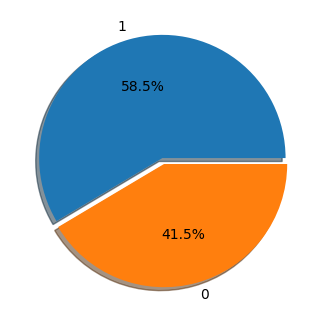

In [44]:
subset = data['Depression'].value_counts()


# Plot pizza
plt.figure(figsize=(5,4))
plt.pie(
    x = subset,
    labels = subset.index,
    autopct='%1.1f%%',
    explode = [0.05,0],
    shadow = True
)
plt.show()

> Os dados não estão muito desbalanceados

In [45]:
# Tirando dados nulos
data.dropna(inplace=True)

# Salvando dados limpos
data.to_csv('datasets\\StudentDepression\\StudentDepressionClean.csv', index=False)

-----------

## Analise de dados Feita MetaAnalise

-------

## Pré-processamento